In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('CyberBulling_Dataset_Bangla.xlsx')


In [3]:
df.head()

,Unnamed: 0,Description,Label
0,0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,sexual
1,1,আপনার জন্ম প্রক্রিয়ার সময় আপনার মায়ের ভিতর কি ...,sexual
2,2,ধজভংগ দের আর ভায়াগ্রা লাগবো না। ধংস হোক এই সব ...,sexual
3,3,বোকাচোদা একটা।,sexual
4,4,তোর দেশে ফেরার অপেক্ষায় রইলাম। জেলে একটা কামরা...,sexual


In [4]:
df.tail()

,Unnamed: 0,Description,Label
6005,6005,কপাল পোড়া,Neutral
6006,6006,আল্লাহ আপনাকে হেদায়েত দান করুক আমীন।আমিও একজন ...,Neutral
6007,6007,"শুধু সুন্দর চেহারার হিরো আপনি নন, সুন্দর মনের ...",Neutral
6008,6008,আল্লাহ আপনাকে সুস্থ রাখুক। ভাইরাস থেকে দেশের ম...,Neutral
6009,6009,"আল্লাহ আপনার উপর রহমত বর্ষণ করুন, আমিন।",Neutral


In [5]:
df.dropna(inplace=True)

In [6]:
df["Label"].value_counts()

Political    1205
troll        1202
sexual       1201
Threat       1201
Neutral      1201
Name: Label, dtype: int64

In [7]:
text = df['Description'].values.tolist()
label = df['Label'].tolist()

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text , label, test_size=0.2, random_state=42)

In [9]:
import ktrain
from ktrain import text
MODEL_NAME = 'xlm-roberta-base'
t = text.Transformer(MODEL_NAME, maxlen=500)


In [10]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 17
	95percentile : 57
	99percentile : 131


Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 18
	95percentile : 60
	99percentile : 142


In [11]:
model = t.get_classifier()

In [12]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)

simulating training for different learning rates... this may take a few moments...
801/801 [==============================] - 7482s 9s/step - loss: 10.3616 - accuracy: 0.2038


done.
Visually inspect loss plot and select learning rate associated with falling loss


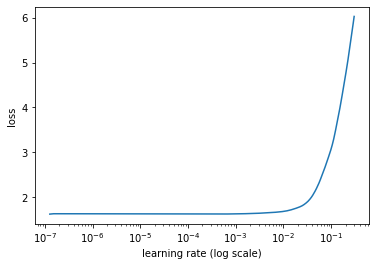

In [13]:
learner.lr_find(show_plot=True, max_epochs=1)

In [14]:
history = learner.fit_onecycle(2e-5, 10)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
802/802 [==============================] - 9905s 12s/step - loss: 1.5086 - accuracy: 0.3340 - val_loss: 1.0878 - val_accuracy: 0.5824
Epoch 2/10
802/802 [==============================] - 9938s 12s/step - loss: 0.9809 - accuracy: 0.6265 - val_loss: 0.8497 - val_accuracy: 0.6789
Epoch 3/10
802/802 [==============================] - 9736s 12s/step - loss: 0.7577 - accuracy: 0.7194 - val_loss: 0.8137 - val_accuracy: 0.7113
Epoch 4/10
802/802 [==============================] - 9751s 12s/step - loss: 0.6587 - accuracy: 0.7639 - val_loss: 0.8017 - val_accuracy: 0.7321
Epoch 5/10
802/802 [==============================] - 9758s 12s/step - loss: 0.5852 - accuracy: 0.7941 - val_loss: 0.7208 - val_accuracy: 0.7354
Epoch 6/10
802/802 [==============================] - 9765s 12s/step - loss: 0.4693 - accuracy: 0.8421 - val_loss: 0.7535 - val_accuracy: 0.7554
Epoch 7/10
802/802 [==============================] - 9771s 12s/ste

In [15]:
learner.validate(class_names=t.get_classes()) 

              precision    recall  f1-score   support

     Neutral       0.73      0.74      0.73       239
   Political       0.88      0.92      0.90       221
      Threat       0.89      0.83      0.86       242
      sexual       0.82      0.72      0.77       269
       troll       0.60      0.70      0.65       231

    accuracy                           0.78      1202
   macro avg       0.78      0.78      0.78      1202
weighted avg       0.79      0.78      0.78      1202



array([[176,   9,   9,   7,  38],
       [  3, 204,   3,   4,   7],
       [ 12,   3, 200,   8,  19],
       [ 23,   7,   3, 193,  43],
       [ 27,  10,  10,  22, 162]], dtype=int64)

In [16]:
def PlotGraph(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'g', label='Training acc')
    plt.plot(x, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'g', label='Training loss')
    plt.plot(x, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend() 

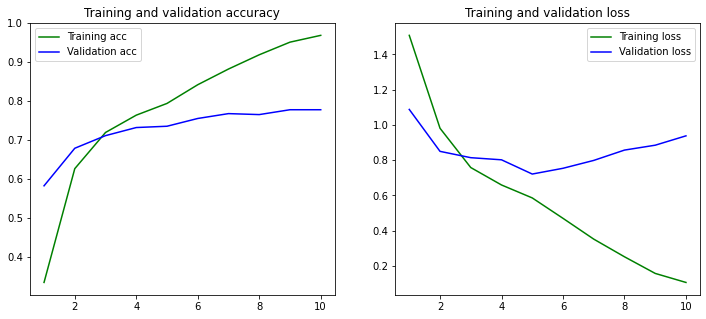

In [17]:
PlotGraph(history)

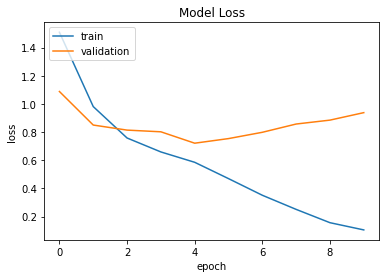

In [18]:
learner.plot('loss')